In [2]:
#필요 라이브러리 임포트
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['axes.unicode_minus'] = False
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [3]:
train_dt = pd.read_csv('train.csv').set_index('id')
test_dt = pd.read_csv('test.csv').set_index('id')

In [4]:
print(train_dt.shape)
train_dt.head(3)

(4752, 59)


,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
id,,,,,,,,,,,,,,,,,,,,,
0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,...,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,...,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,...,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN


In [5]:
new_columns = ['temperatures_00','local_air_pressure_01','wind_speed_02','wind_speed_03','daily_cumulative_precipitation_04',
               'barometric_pressure_05','local_air_pressure_06', 'temperatures_07','barometric_pressure_08','barometric_pressure_09',
               'daily_cumulative_precipitation_10','cumulative_daily_insolation_11','humidity_12','wind_direction_13','cumulative_daily_insolation_14',# 10-14
               'wind_direction_15', 'cumulative_daily_insolation_16','wind_direction_17', 'wind_speed_18','cumulative_daily_insolation_19',# 15-19
               'humidity_20', 'daily_cumulative_precipitation_21', 'local_air_pressure_22','barometric_pressure_23','wind_speed_24',# 20-24
               'wind_direction_25', 'wind_speed_26', 'local_air_pressure_27','temperatures_28','local_air_pressure_29', # 25-29
               'humidity_30', 'temperatures_31','temperatures_32','barometric_pressure_33','cumulative_daily_insolation_34', # 30-34
               'wind_direction_35', 'daily_cumulative_precipitation_36','humidity_37','humidity_38','daily_cumulative_precipitation_39',# 35-39
               'Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09','Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17', 'Y18'
              ]

train_dt.columns = new_columns
test_dt.columns = new_columns[:-19]
data = pd.concat([train_dt, test_dt])
data.head()

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,...,wind_direction_13,wind_direction_15,wind_direction_17,wind_direction_25,wind_direction_35,wind_speed_02,wind_speed_03,wind_speed_18,wind_speed_24,wind_speed_26
id,,,,,,,,,,,,,,,,,,,,,
0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,...,71.3,101.1,56.1,2.3,256.4,1.2,0.6,0.3,1.1,0.5
1,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,...,121.8,165.3,0.0,0.0,215.4,1.7,1.9,0.4,0.0,0.0
2,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,...,232.0,144.0,0.0,0.0,235.2,1.1,2.3,0.6,0.0,0.0
3,12.0,11.0,11.0,19.5,19.5,9.5,9.0,9.5,9.0,6.0,...,0.0,115.9,294.1,0.0,214.0,1.5,0.7,0.1,0.0,0.2
4,12.0,10.5,10.5,19.0,19.5,9.5,8.5,9.5,8.5,6.0,...,0.0,124.7,0.0,0.0,174.9,0.8,1.7,0.0,0.0,0.0


In [6]:
Y = list(train_dt.columns[-19:])

def show_plot(col_group):
    plt.figure(figsize = (30,20))
    
    plt.subplot(311)
    plt.plot(data[col_group])
    
    plt.subplot(323)
    sns.boxplot(x='variable', y='value', data=pd.melt(data[col_group]))
    
    plt.subplot(324)
    for col in col_group:
        sns.kdeplot(data[col], kernel='epa')
    
    plt.subplot(313)
    for col in col_group:
        sns.distplot(data[col], kde=False)
    plt.show()
    
    plt.figure(figsize = (30, 7))
    sns.heatmap(train_dt[col_group + Y].corr().iloc[:5,5:], cmap = plt.cm.RdYlBu_r,annot = True, vmin=-1, vmax=1)   

### 기온

- `센서 측정 온도`와 `기온`에는 **높은 양의 상관관계**

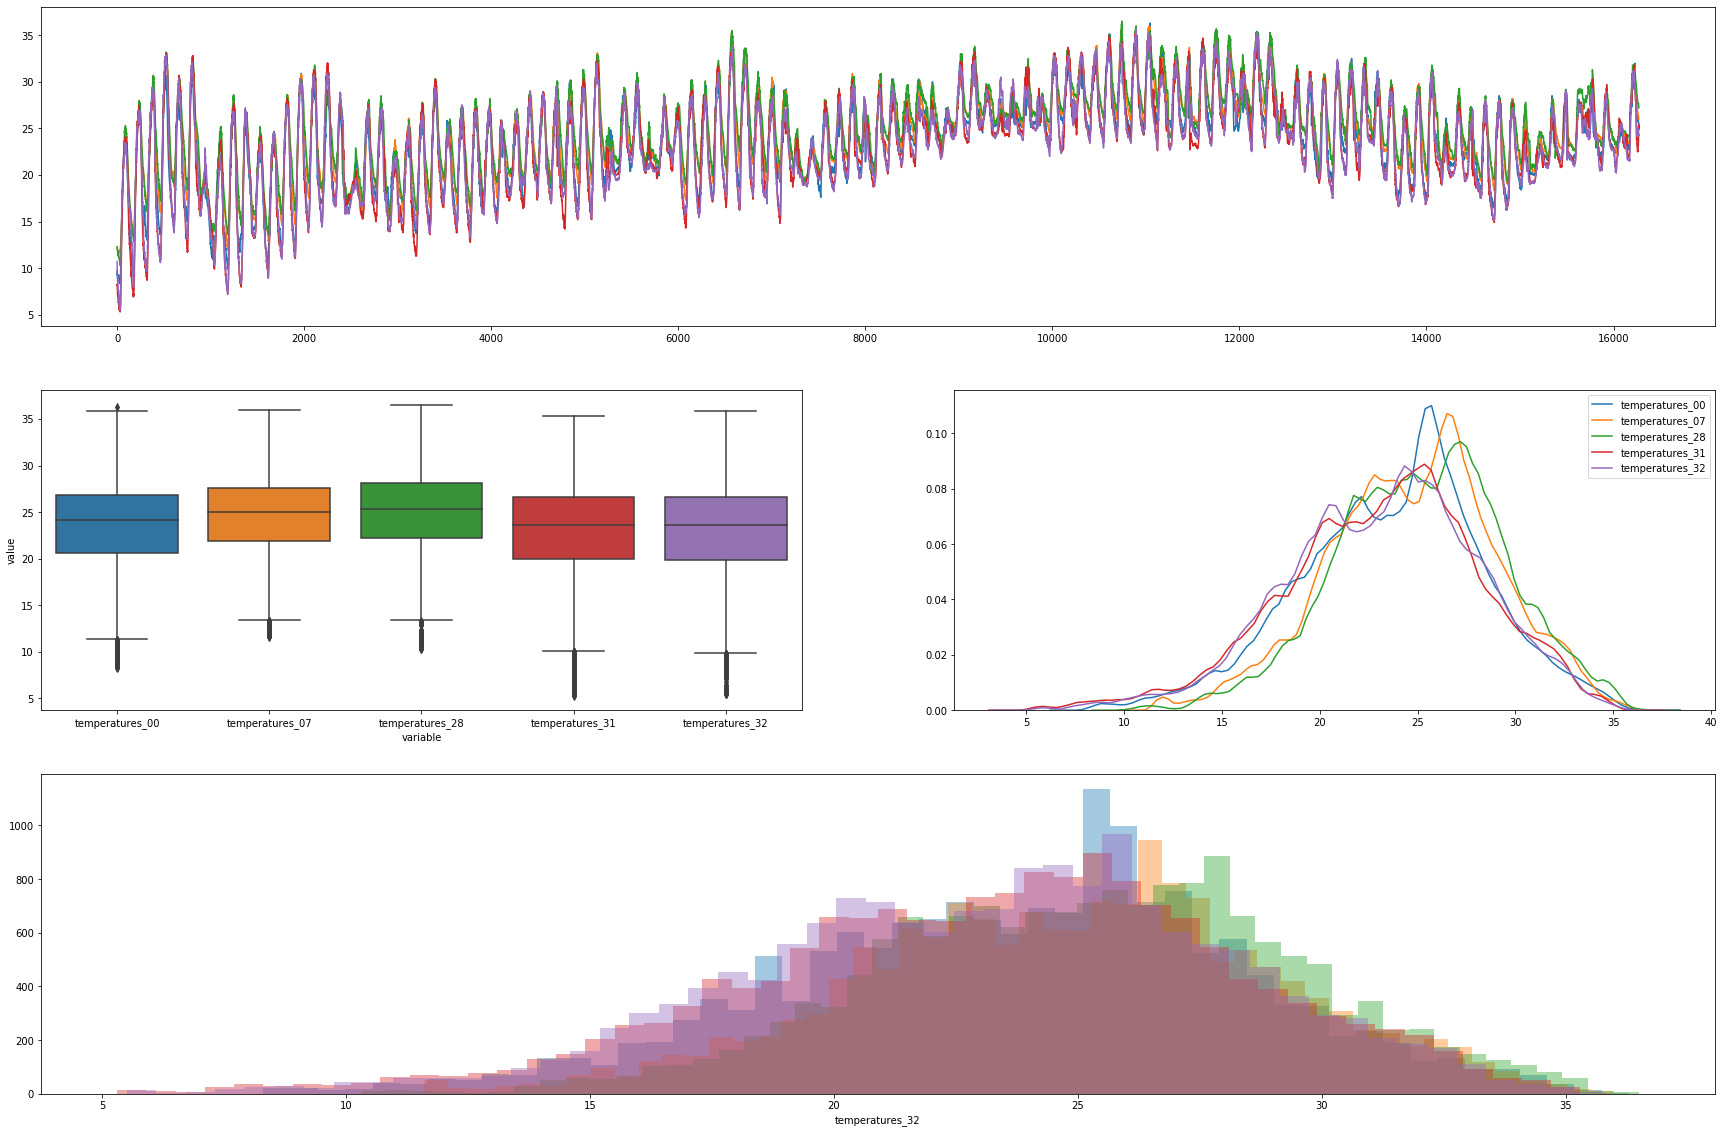

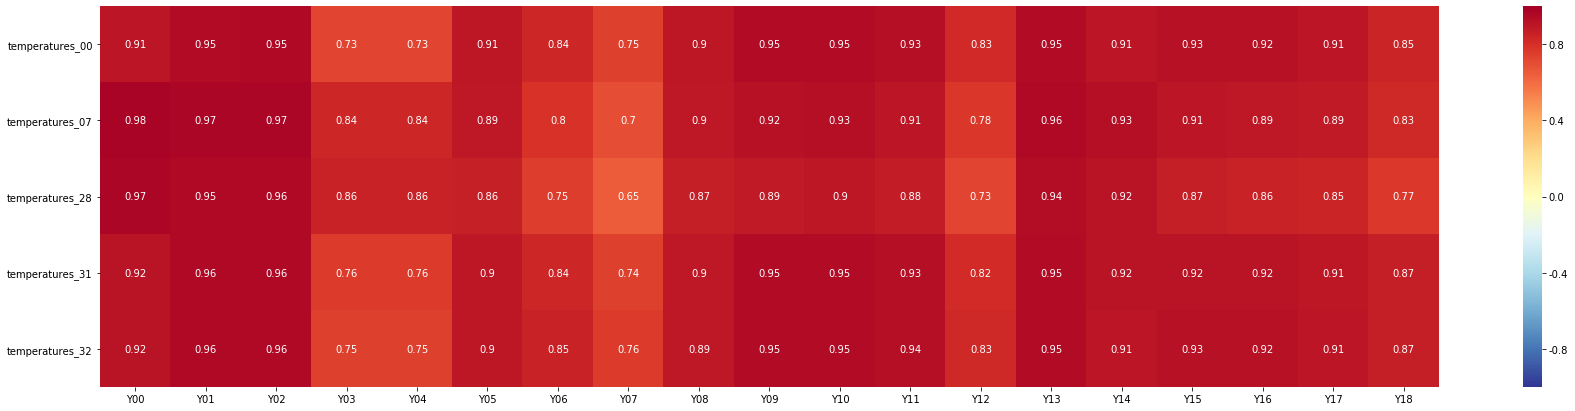

In [7]:
group_1 = ['temperatures_00', 'temperatures_07', 'temperatures_28', 'temperatures_31', 'temperatures_32']
show_plot(group_1)

### 현지 기압

- 1,6 / 22, 29 상당히 유사
- Y00-17 까지 현지 기압과는 상관관계가 없다.(30일 기준)
- Y18은 약한 음의 상관관계(3일)
    - **3일의 데이터로 음의 상관관계가 있다고 생각해야 될까?**
    - **30일의 Y18을 예측 후 30일의 기압과 Y18의 상관관계를 알고 싶음**
    - **없다면 feature를 지워야 할까?**

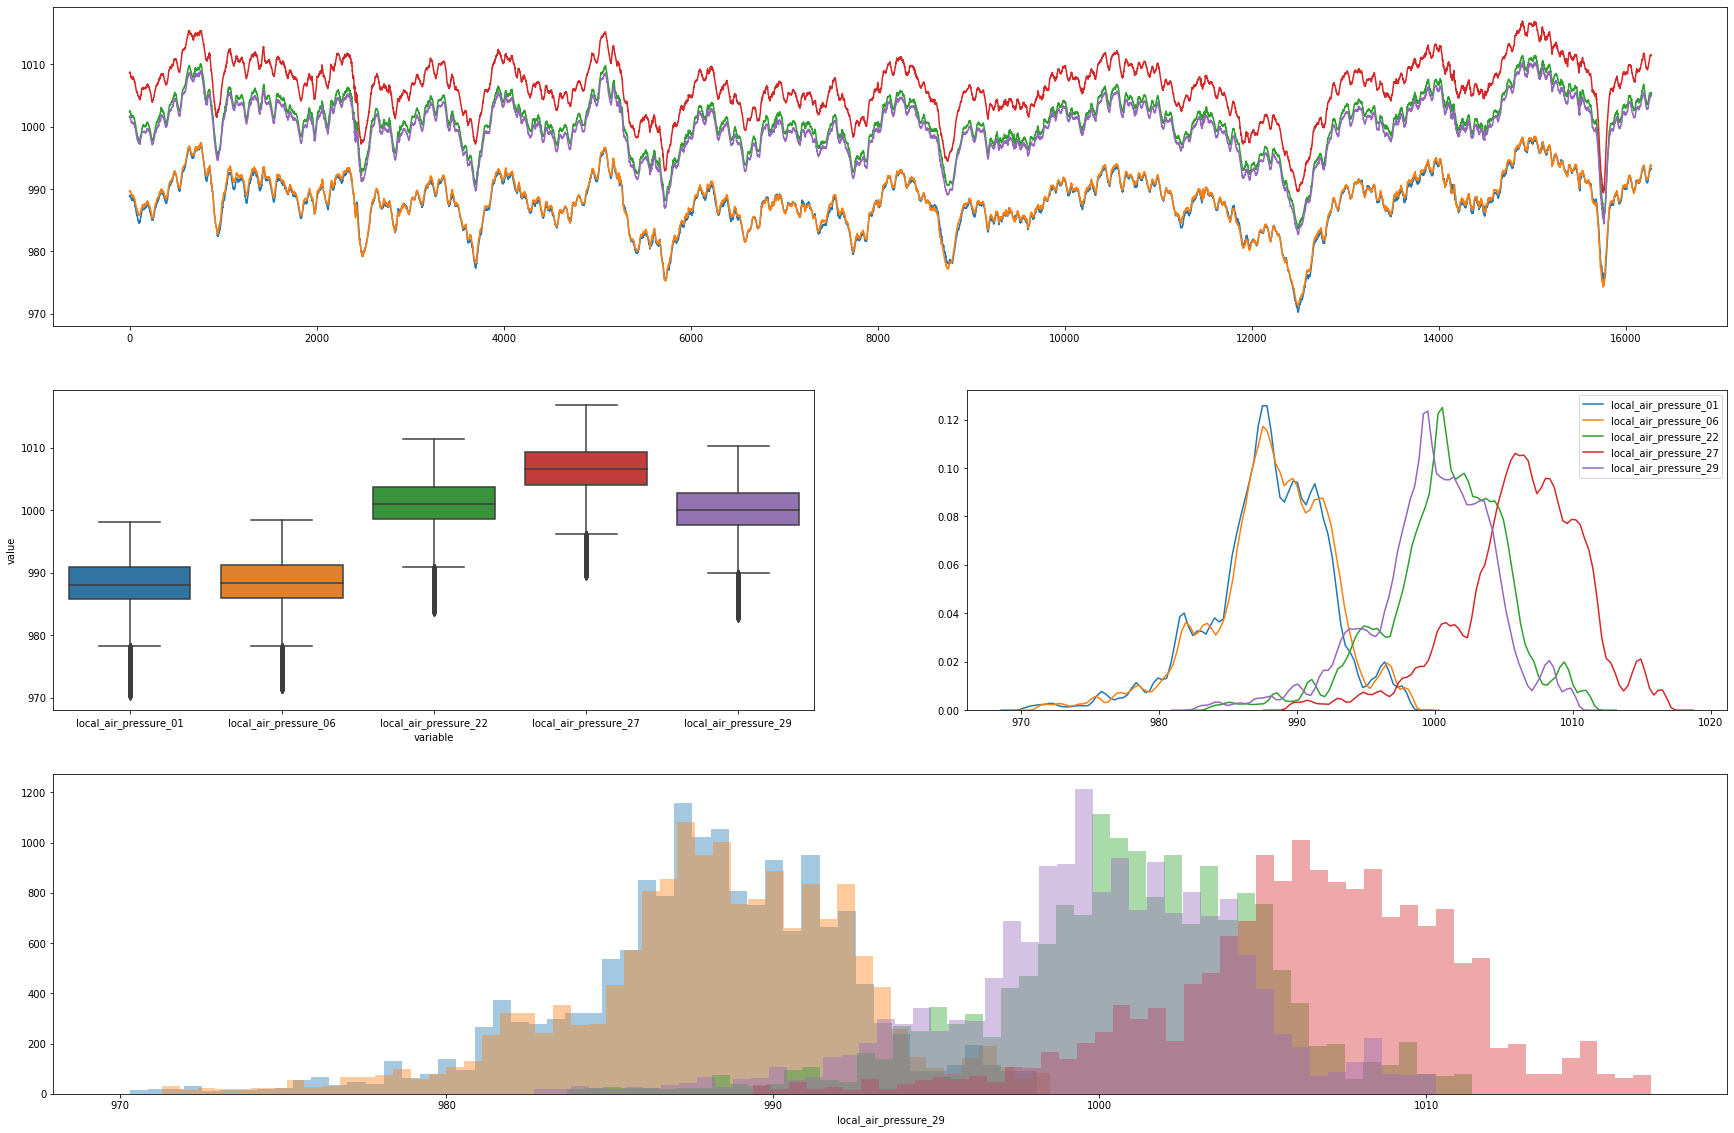

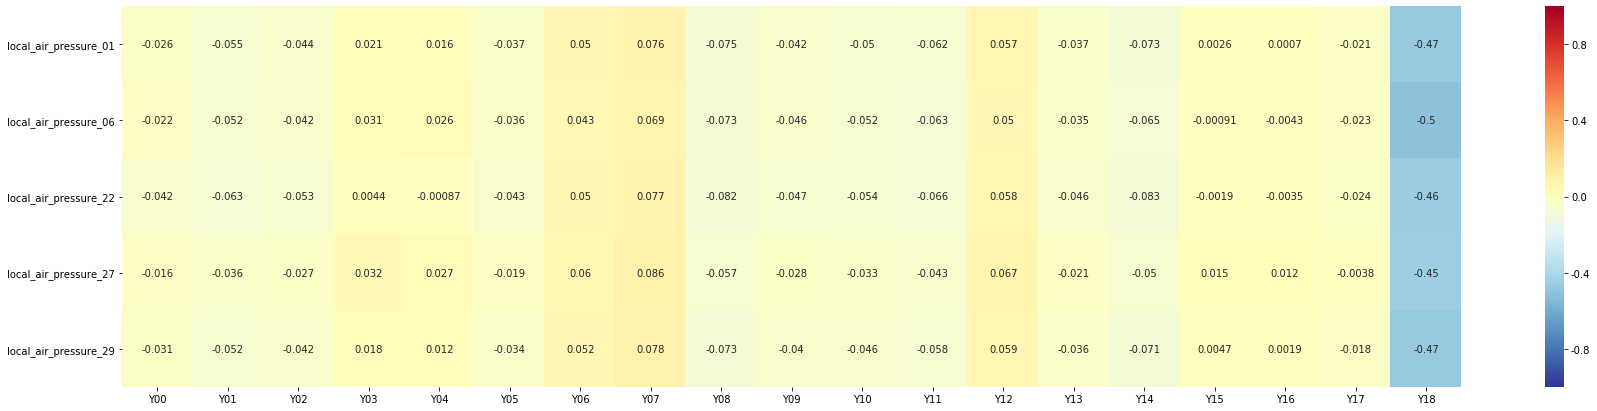

In [8]:
group_2 = ['local_air_pressure_01', 'local_air_pressure_06', 'local_air_pressure_22', 'local_air_pressure_27', 'local_air_pressure_29']
show_plot(group_2)

### 풍속

- 변동이 너무 심하다.
- 시간 또는 일별 변화량 확인

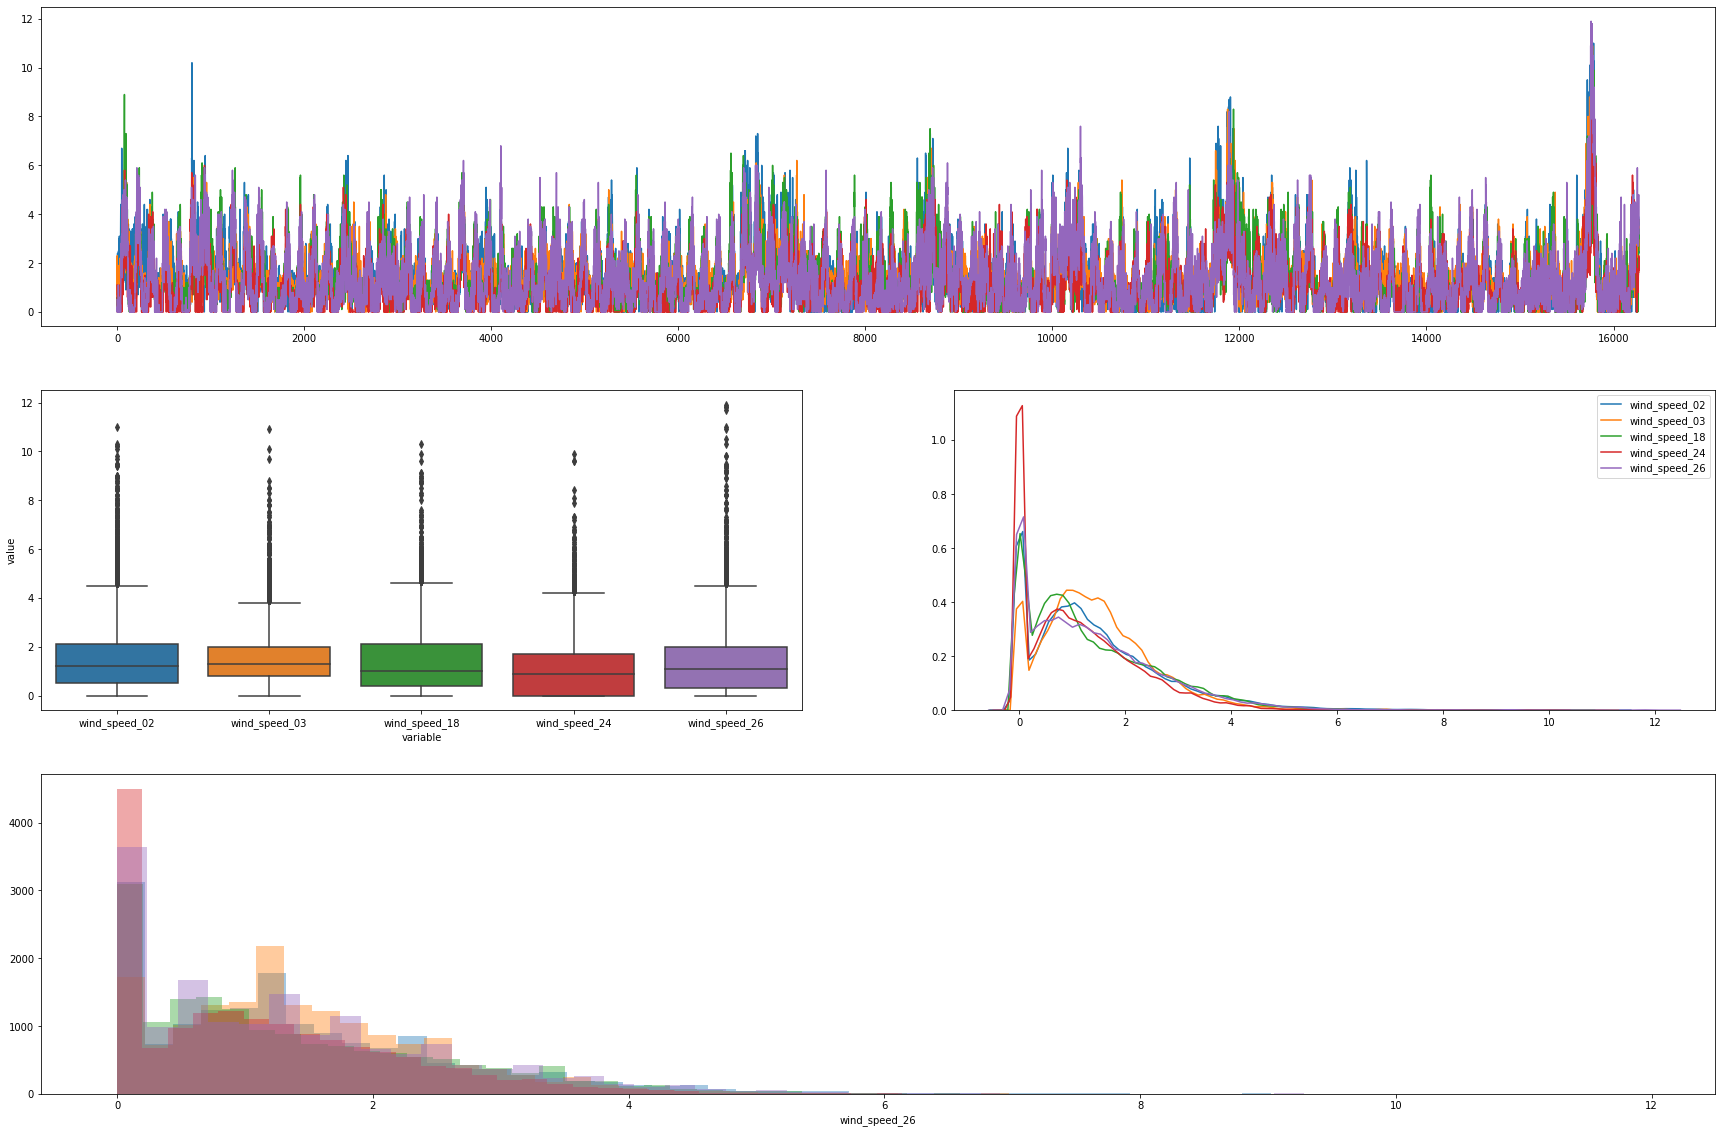

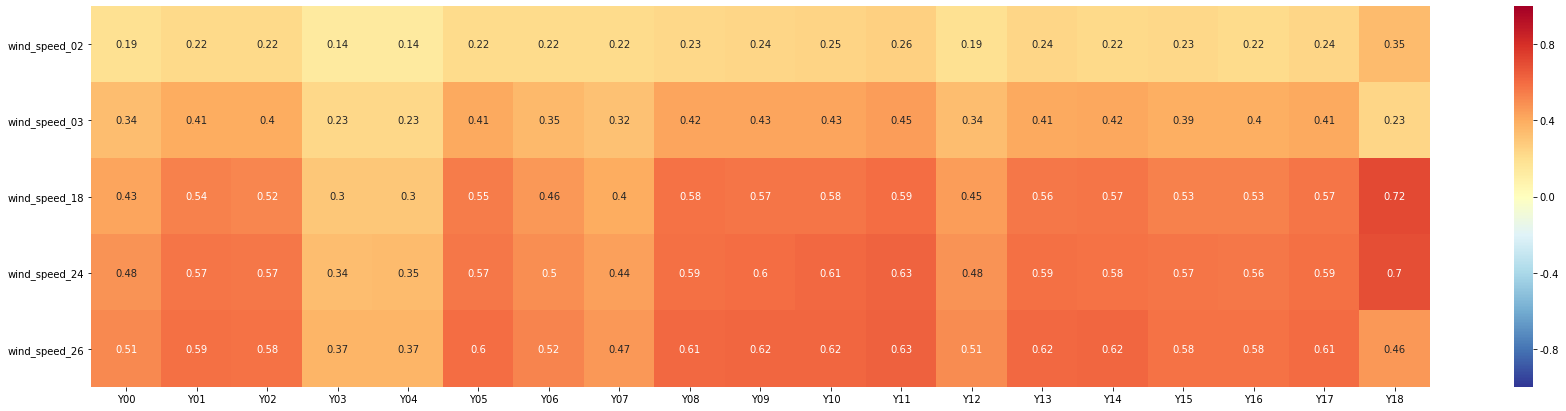

In [9]:
group_3 = ['wind_speed_02', 'wind_speed_03', 'wind_speed_18', 'wind_speed_24', 'wind_speed_26']
show_plot(group_3)

### 일일 누적강수량

- 0의 비율 확인 / 값이 있을 때 강수량과 상관관계 확인 필요

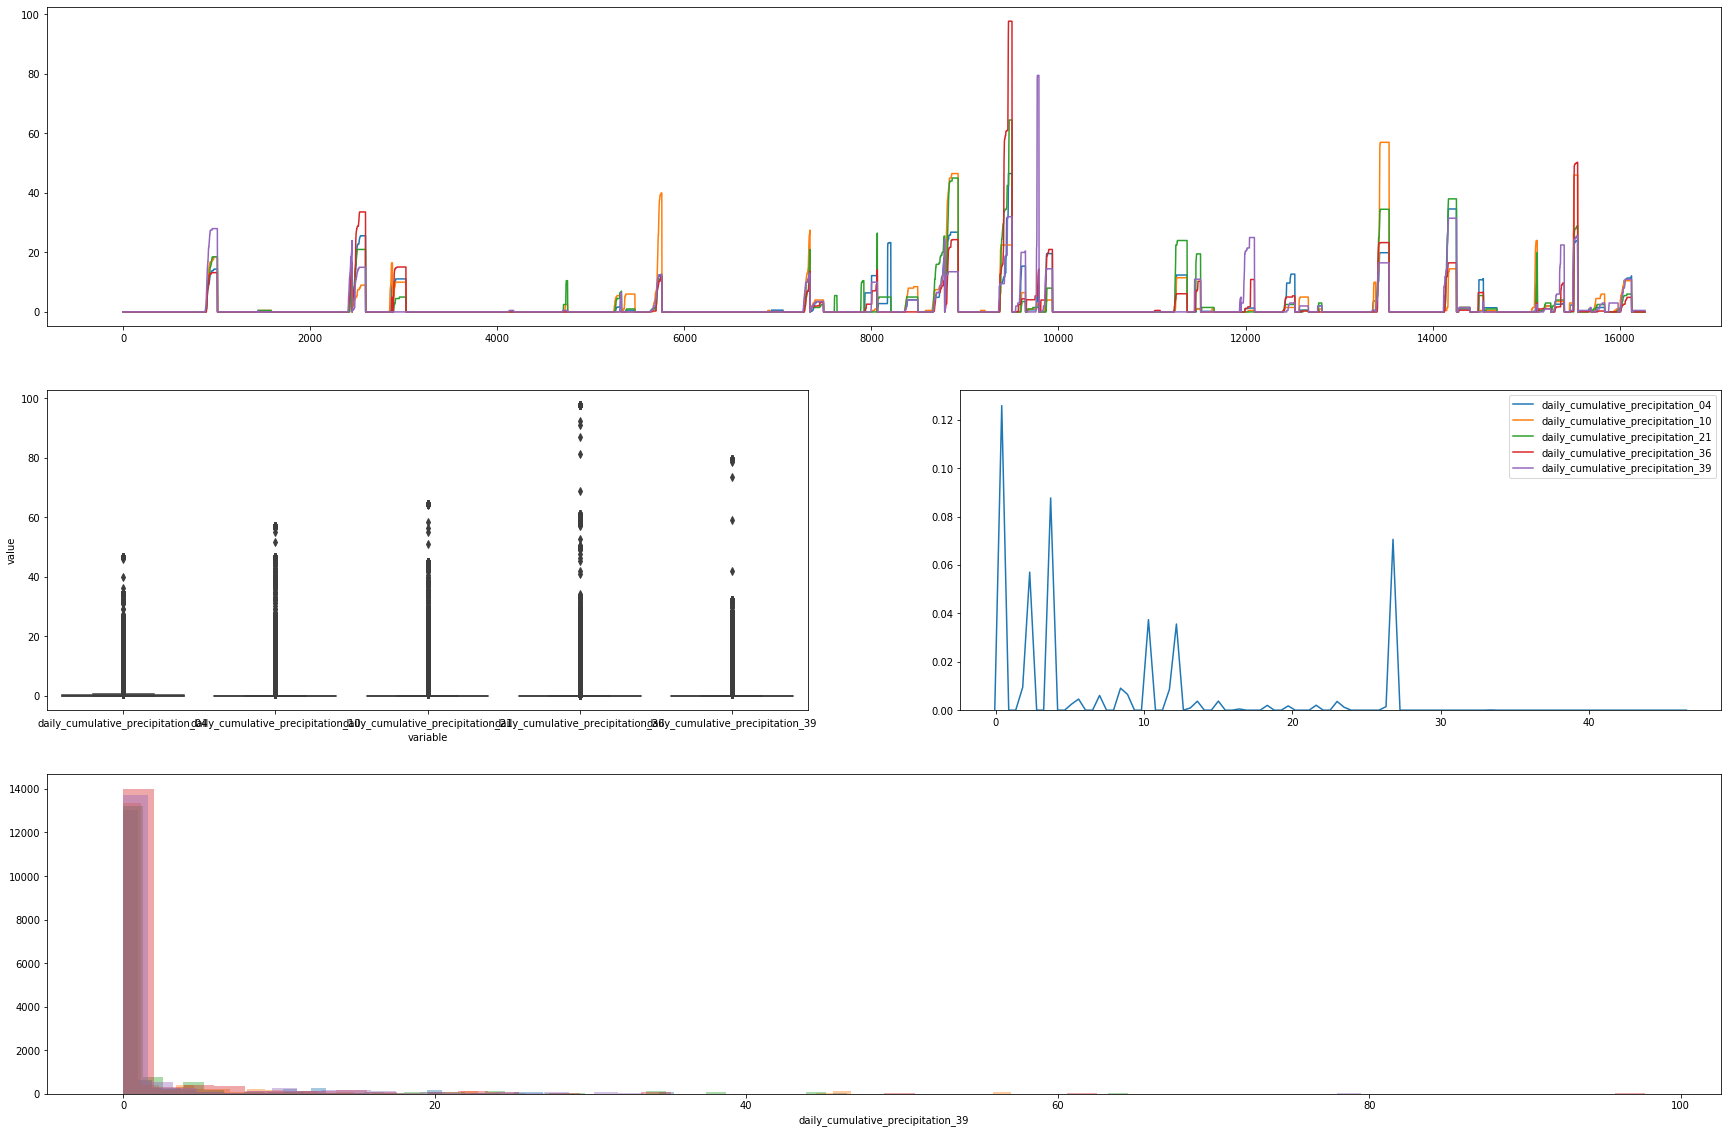

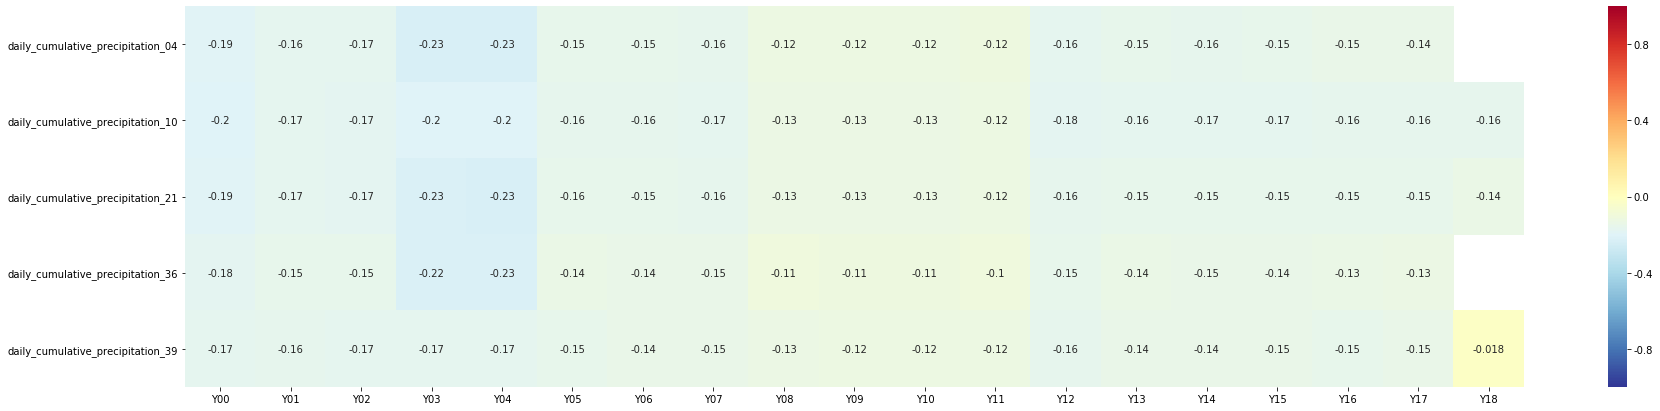

In [10]:
group_4 = ['daily_cumulative_precipitation_04', 'daily_cumulative_precipitation_10', 'daily_cumulative_precipitation_21', 'daily_cumulative_precipitation_36', 'daily_cumulative_precipitation_39']
show_plot(group_4)

3일간의 강수량이 있는 데이터 갯수
0
27
45
0
53


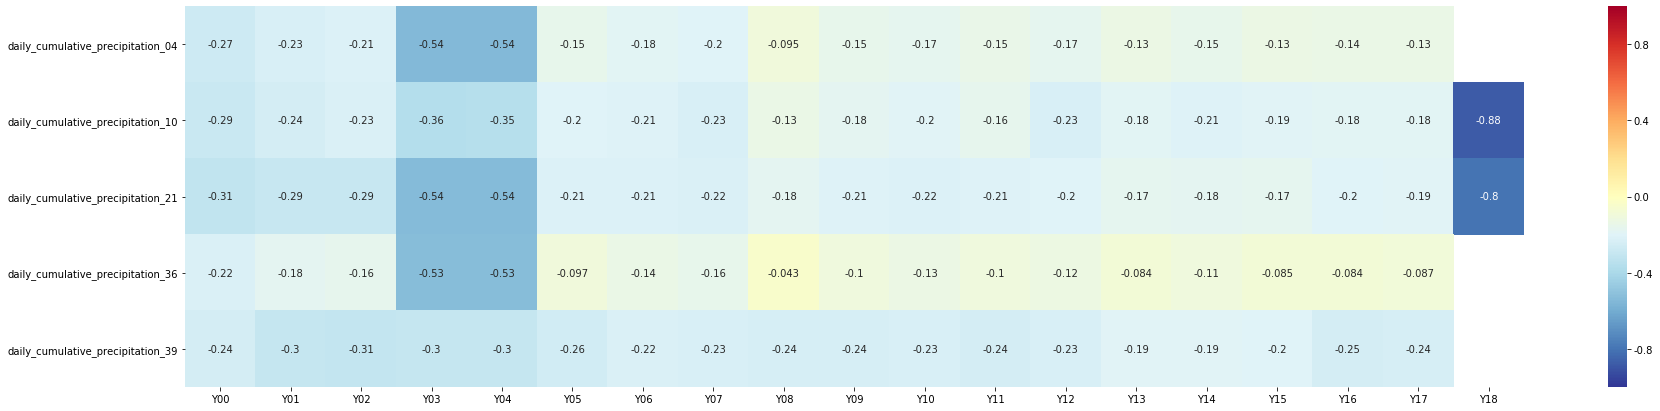

In [87]:
# 한 장소에서라도 강수량이 있을 때
def func(test):
    if test['daily_cumulative_precipitation_04'] > 0:# and data['daily_cumulative_precipitation_10'] > 0 and data['daily_cumulative_precipitation_21'] > 0 and data['daily_cumulative_precipitation_36'] > 0 and data['daily_cumulative_precipitation_39'] > 0:
        return True
    if test['daily_cumulative_precipitation_10'] > 0:
        return True
    if test['daily_cumulative_precipitation_21'] > 0:
        return True
    if test['daily_cumulative_precipitation_36'] > 0:
        return True
    if test['daily_cumulative_precipitation_39'] > 0:
        return True
    
    return False

plt.figure(figsize = (30, 7))

print('3일간의 강수량이 있는 데이터 갯수')
for i in group_4:
    test = (train_dt[~train_dt['Y18'].isnull()][i] > 0)
    print(test.sum())

test = train_dt[train_dt[group_4].apply(func, axis = 1)]

sns.heatmap(test[group_4 + Y].corr().iloc[:5,5:], cmap = plt.cm.RdYlBu_r,annot = True, vmin=-1, vmax=1)

In [86]:
# 39의 상관계수가 보이지 않은 이유
# 모든 값이 0.5로 동일
test[~test['Y18'].isnull()]['daily_cumulative_precipitation_39'].describe()

count    53.0
mean      0.5
std       0.0
min       0.5
25%       0.5
50%       0.5
75%       0.5
max       0.5
Name: daily_cumulative_precipitation_39, dtype: float64

285


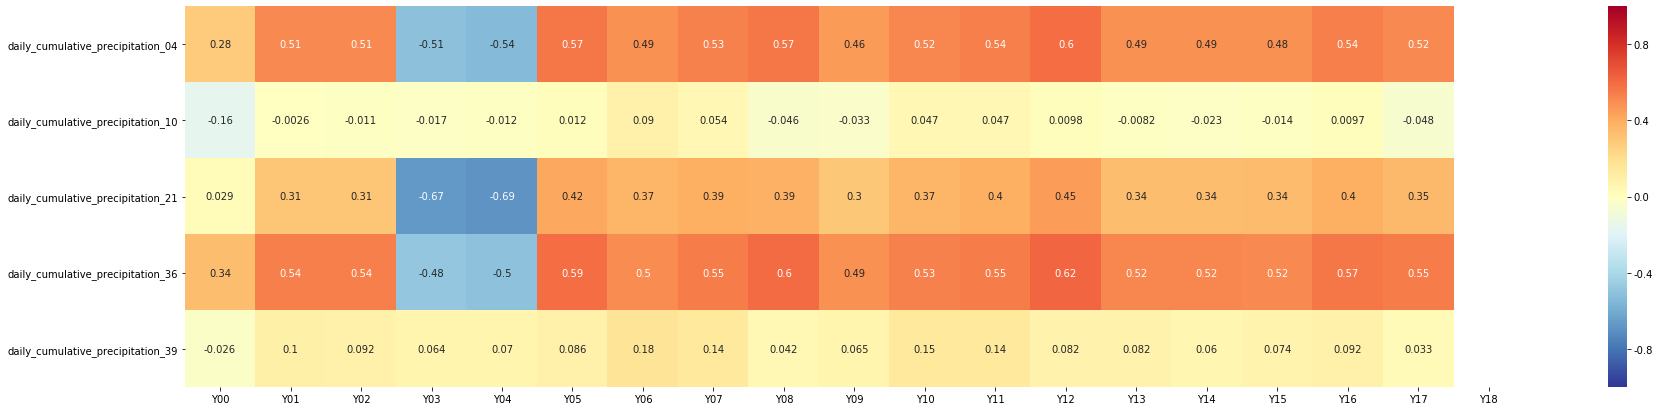

In [62]:
# 모든 곳에 강수량이 측정이 됐을 때
def func(data):
    if data['daily_cumulative_precipitation_04'] > 0 and data['daily_cumulative_precipitation_10'] > 0 and data['daily_cumulative_precipitation_21'] > 0 and data['daily_cumulative_precipitation_36'] > 0 and data['daily_cumulative_precipitation_39'] > 0:
        return True
#     if data['daily_cumulative_precipitation_10'] > 0:
#         return True
#     if data['daily_cumulative_precipitation_21'] > 0:
#         return True
#     if data['daily_cumulative_precipitation_36'] > 0:
#         return True
#     if data['daily_cumulative_precipitation_39'] > 0:
#         return True
    
    return False

plt.figure(figsize = (30, 7))

test = train_dt[train_dt[group_4].apply(func, axis = 1)]

print(len(test))

sns.heatmap(test[group_4 + Y].corr().iloc[:5,5:], cmap = plt.cm.RdYlBu_r,annot = True, vmin=-1, vmax=1)

- Y3,4 와 나머지가 다른 경향
- Y18은 어떤 쪽인지

### 해면 기압

- 해면 기압과 Y18은 음의 상관관계
- 현지 기압과 유사
- 현지 기압 / 해면 기압 둘 다 필요할까
- 각 feature별 데이터의 값이 상당히 유사

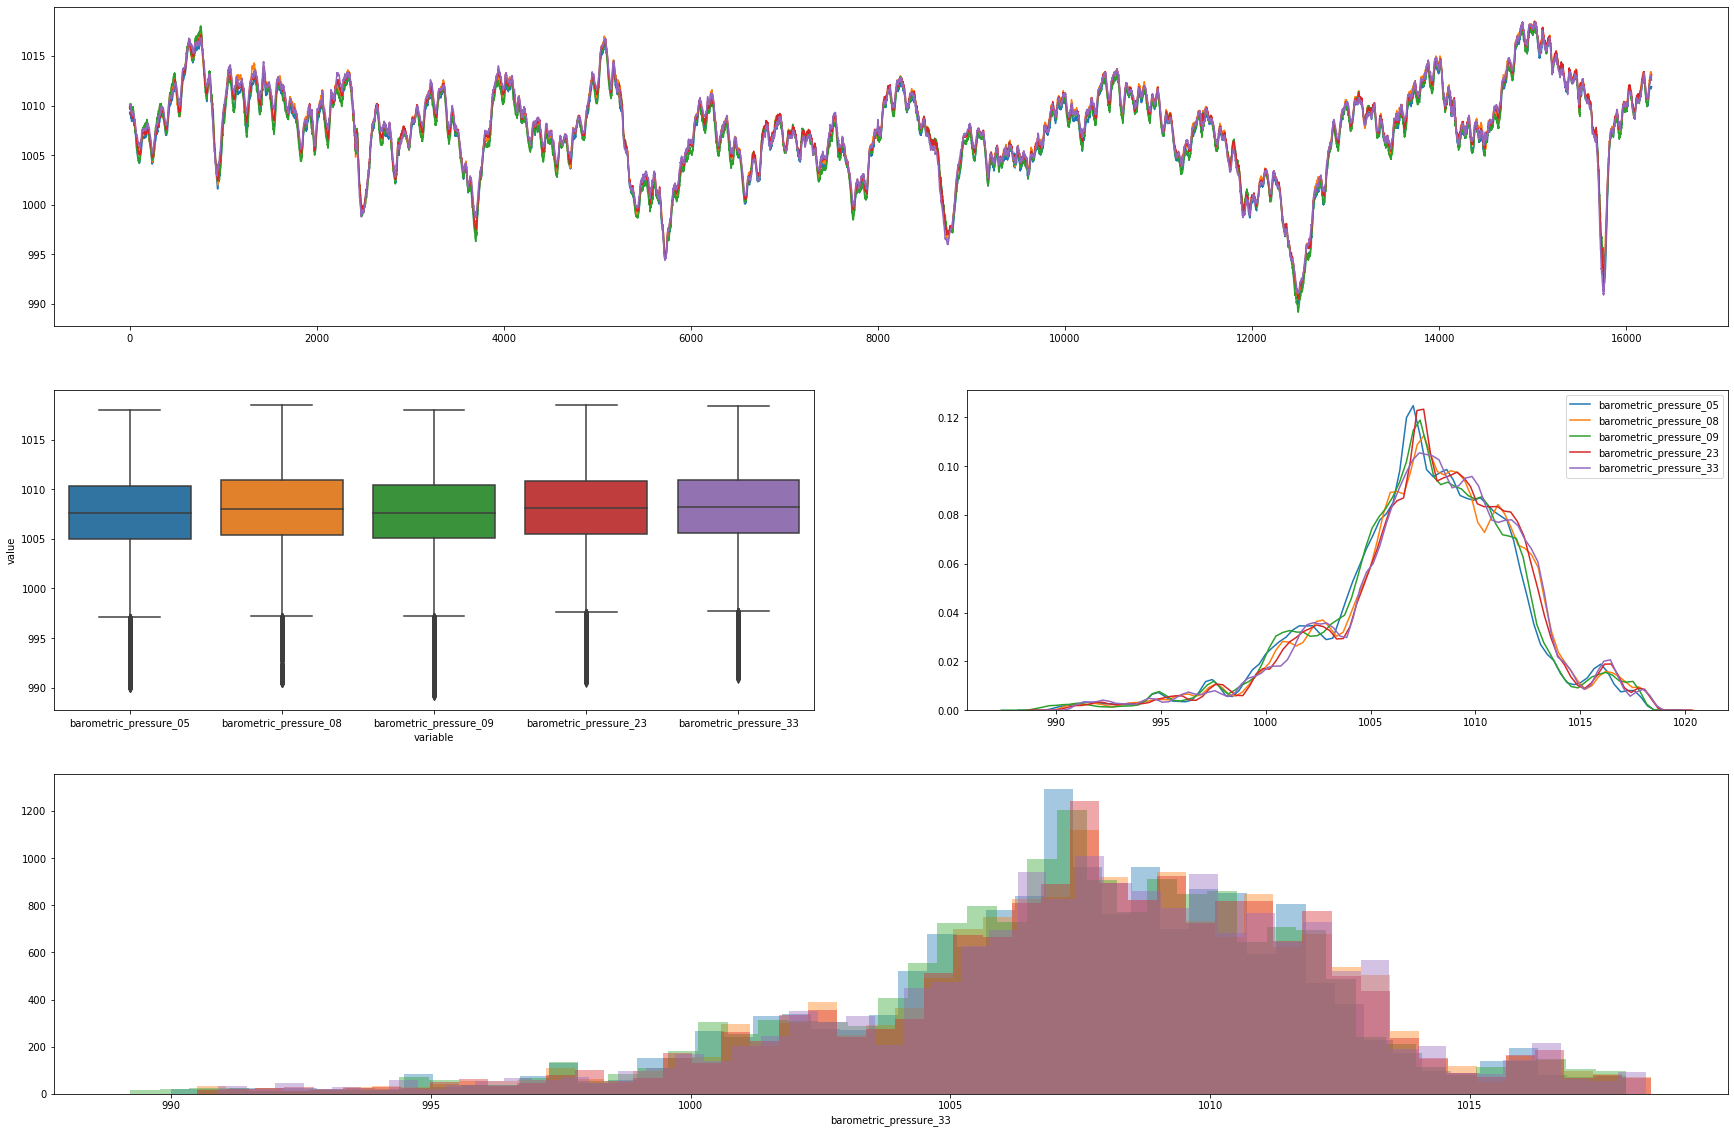

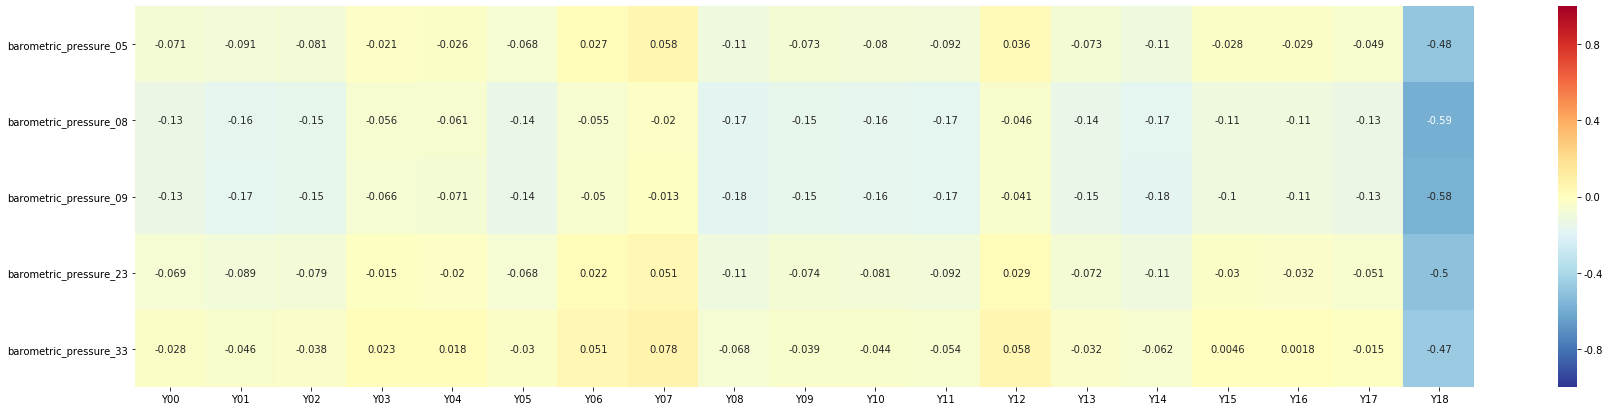

In [88]:
group_5 = ['barometric_pressure_05', 'barometric_pressure_08', 'barometric_pressure_09', 'barometric_pressure_23', 'barometric_pressure_33']
show_plot(group_5)

### 일일 누적일사량

- 14, 16, 19 실내?

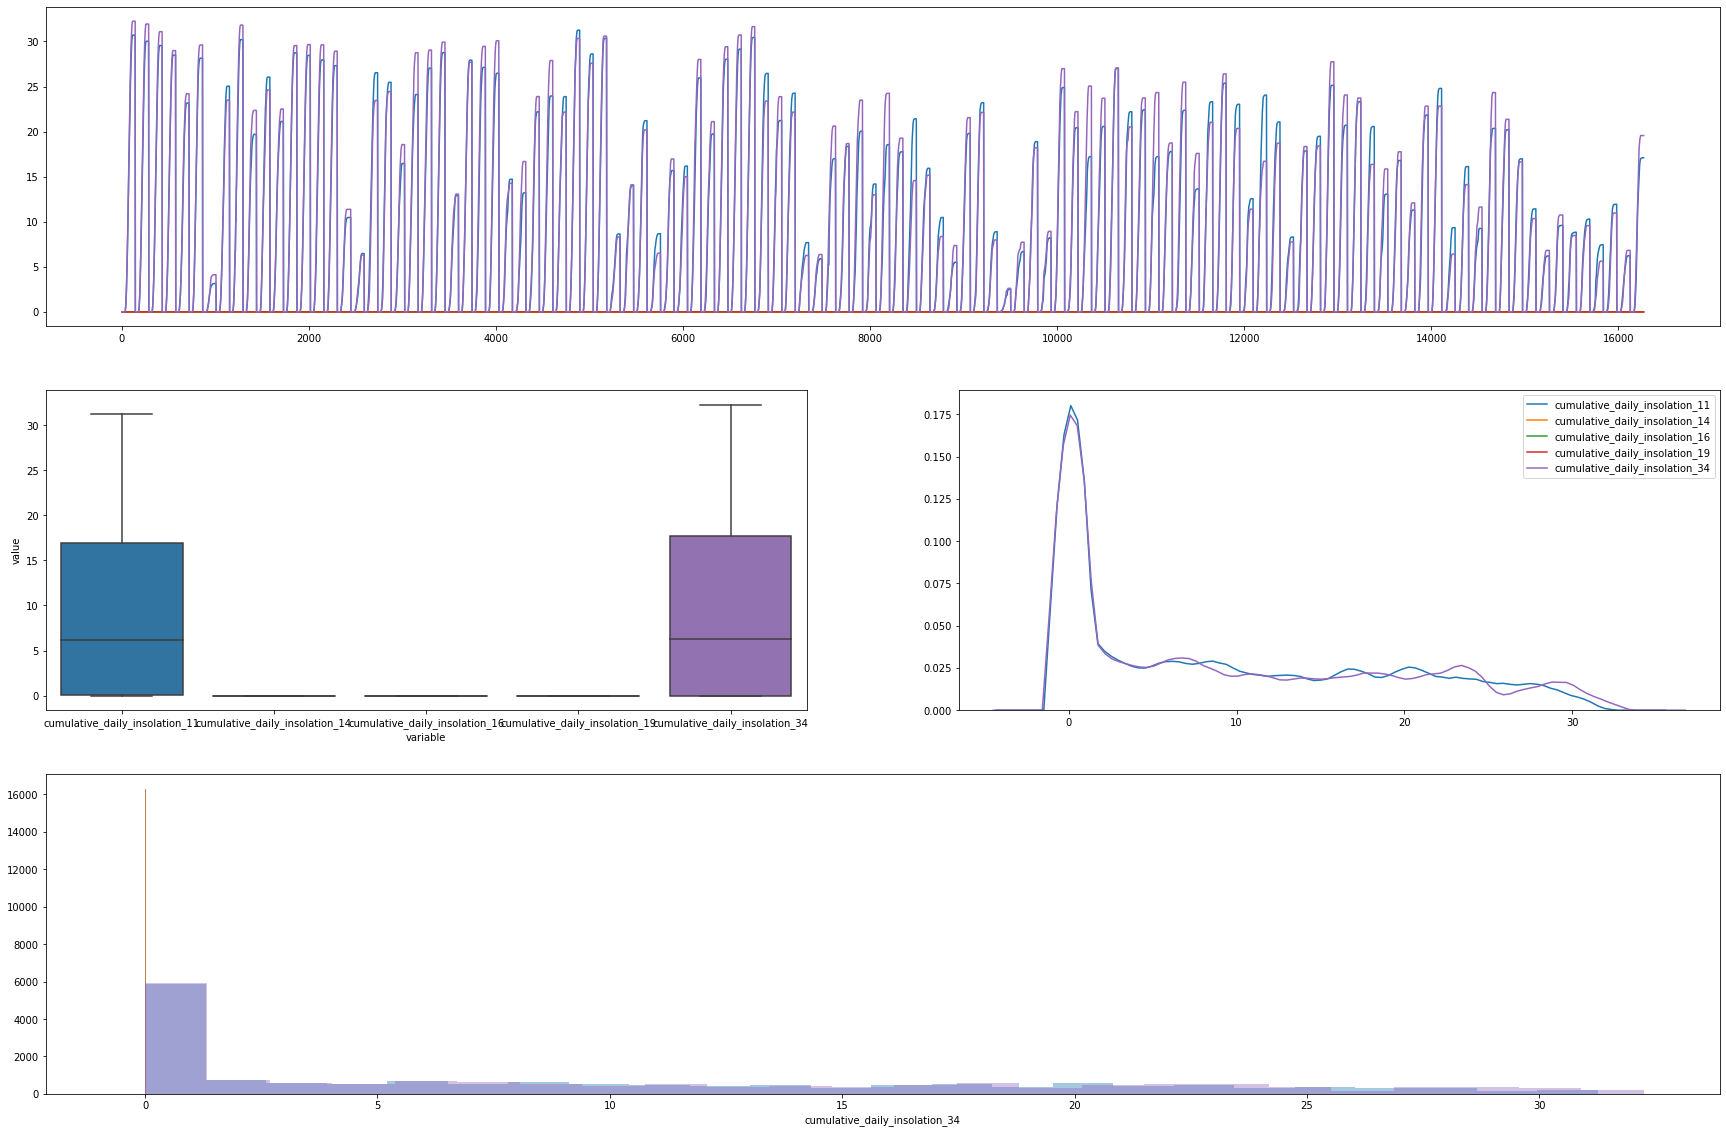

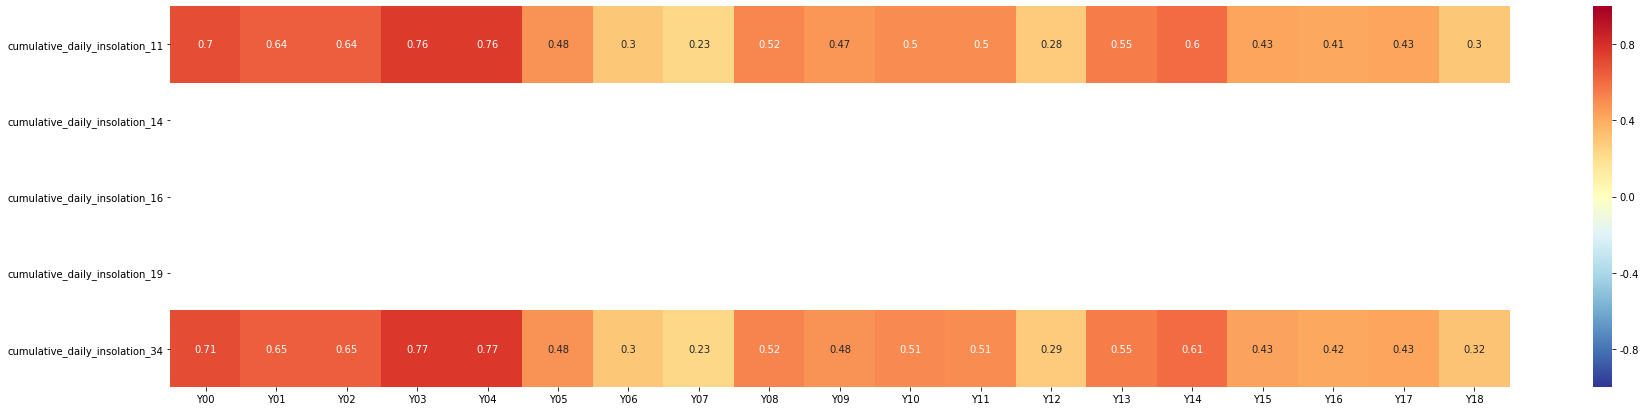

In [90]:
group_6 = ['cumulative_daily_insolation_11', 'cumulative_daily_insolation_14', 'cumulative_daily_insolation_16', 'cumulative_daily_insolation_19', 'cumulative_daily_insolation_34']
show_plot(group_6)

- 14,16,19 값이 없다.
- 필요 없다.

In [93]:
data[group_6].describe()

,cumulative_daily_insolation_11,cumulative_daily_insolation_14,cumulative_daily_insolation_16,cumulative_daily_insolation_19,cumulative_daily_insolation_34
count,16272.000000,16272.0,16272.0,16272.0,16272.000000
mean,9.098965,0.0,0.0,0.0,9.381997
std,9.452084,0.0,0.0,0.0,9.856273
min,0.000000,0.0,0.0,0.0,0.000000
25%,0.030000,0.0,0.0,0.0,0.000000
50%,6.170000,0.0,0.0,0.0,6.240000
75%,16.980000,0.0,0.0,0.0,17.652500
max,31.250000,0.0,0.0,0.0,32.240000


### 습도

- 전반적으로 습도와 온도는 음의 상관관계이다.

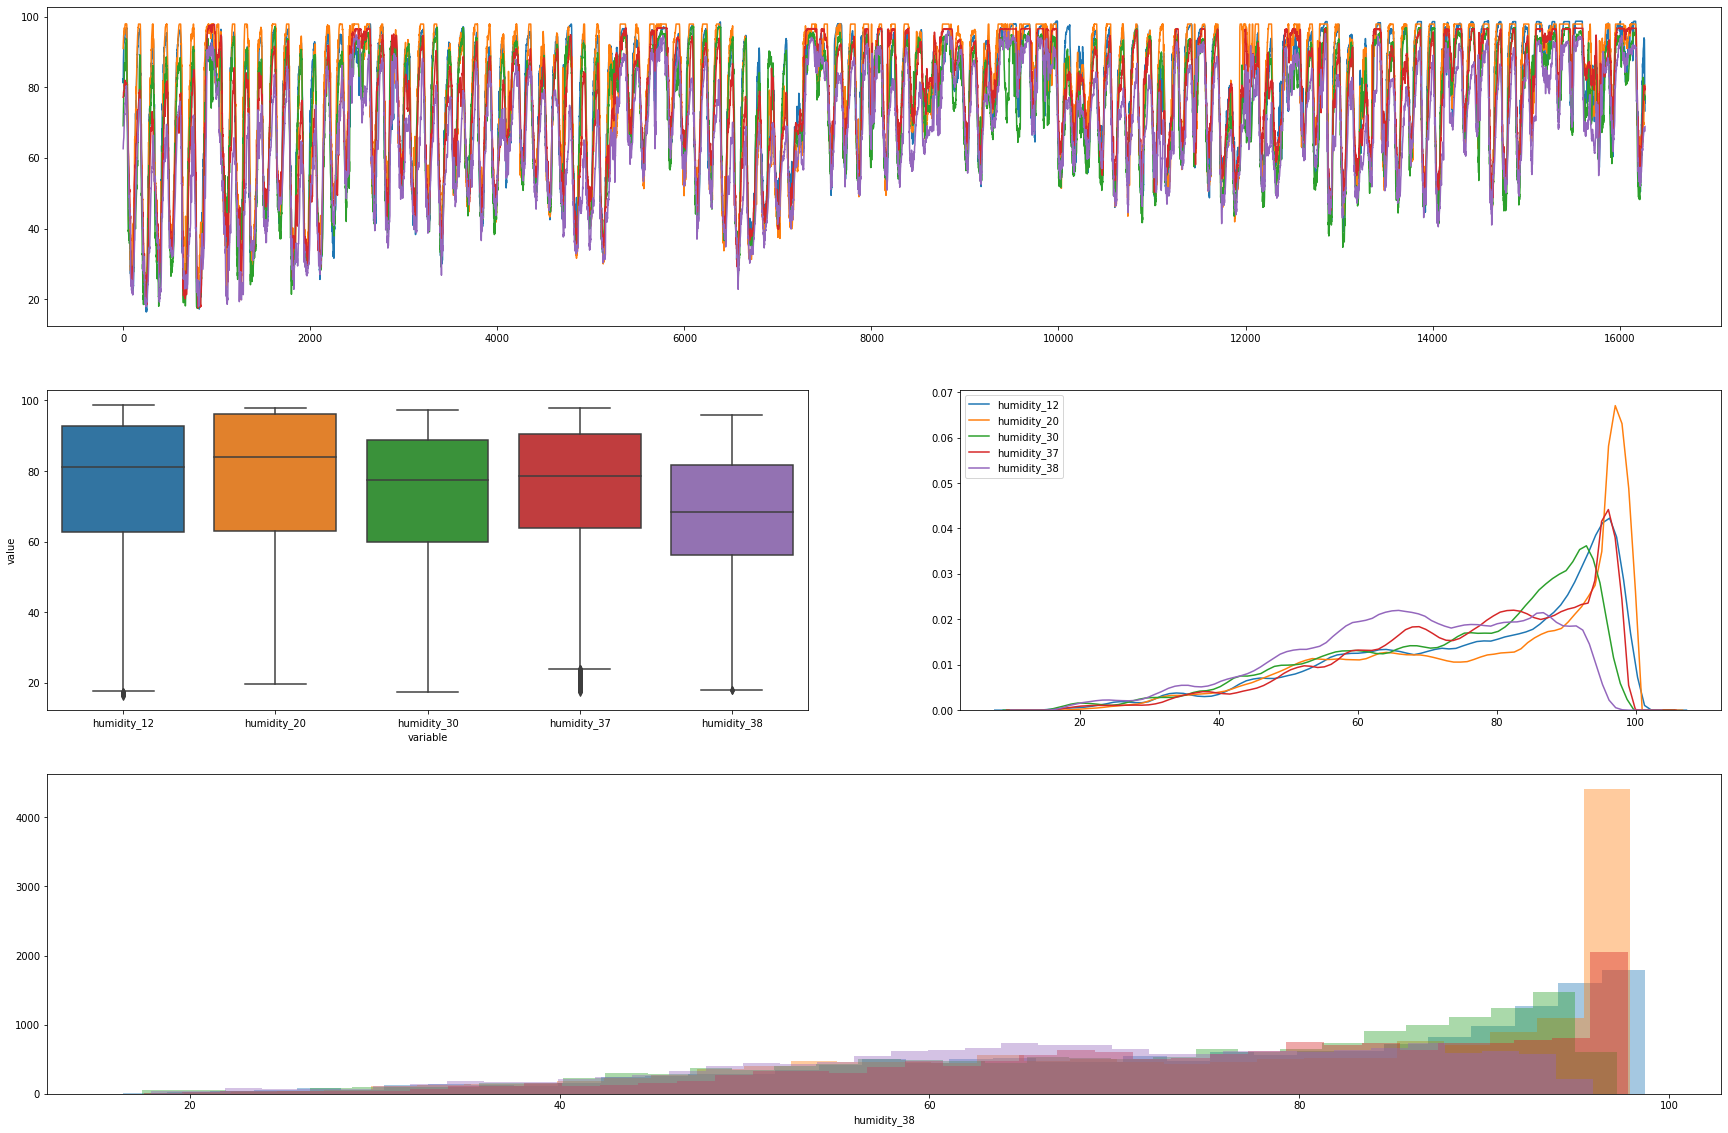

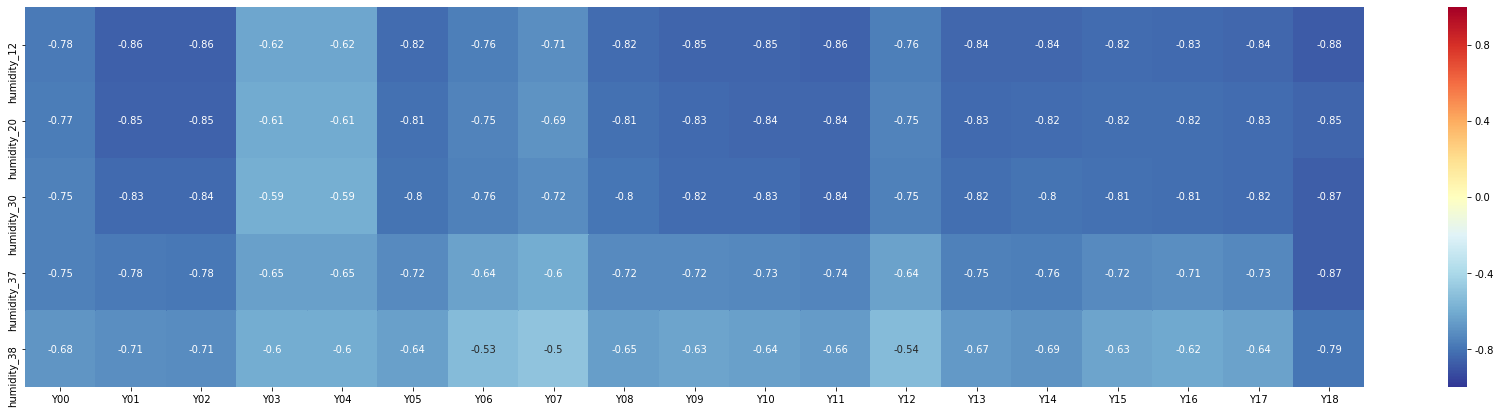

In [94]:
group_7 = ['humidity_12', 'humidity_20', 'humidity_30', 'humidity_37', 'humidity_38']
show_plot(group_7)

### 풍향

- 13은 영향력이 낮다.(삭제?)

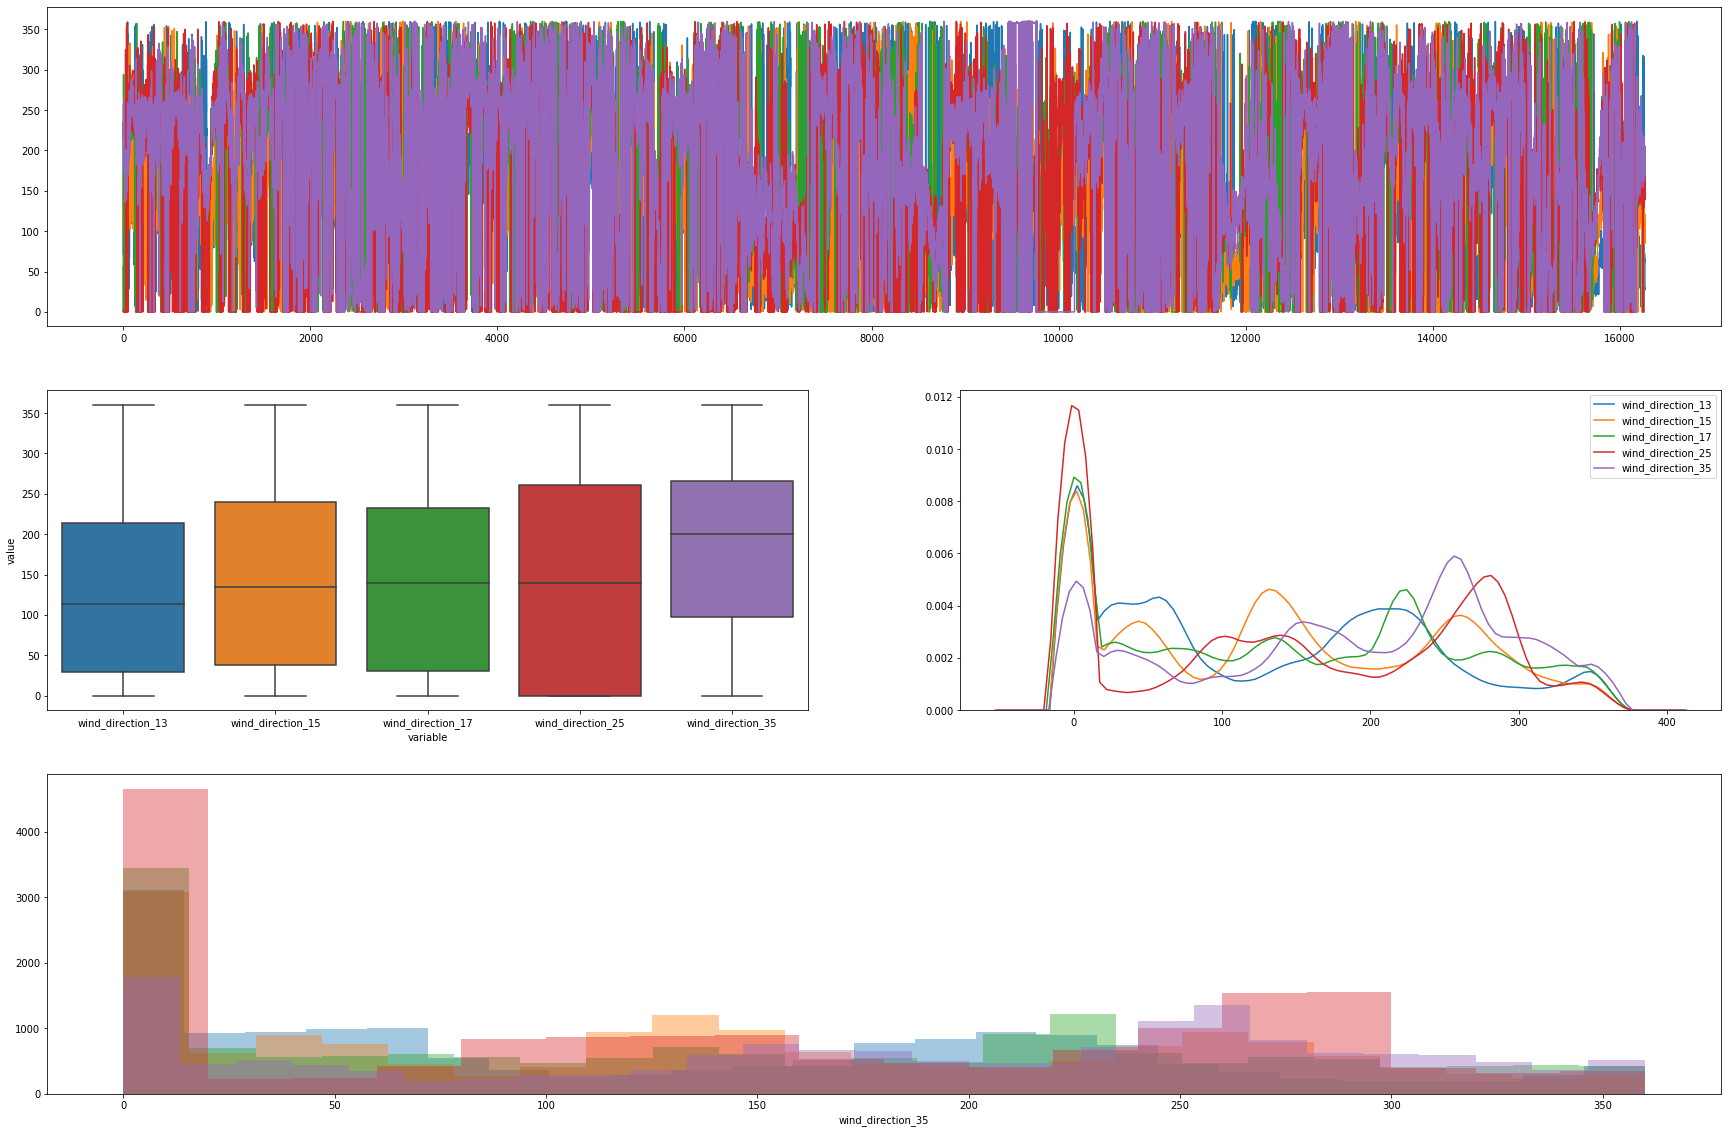

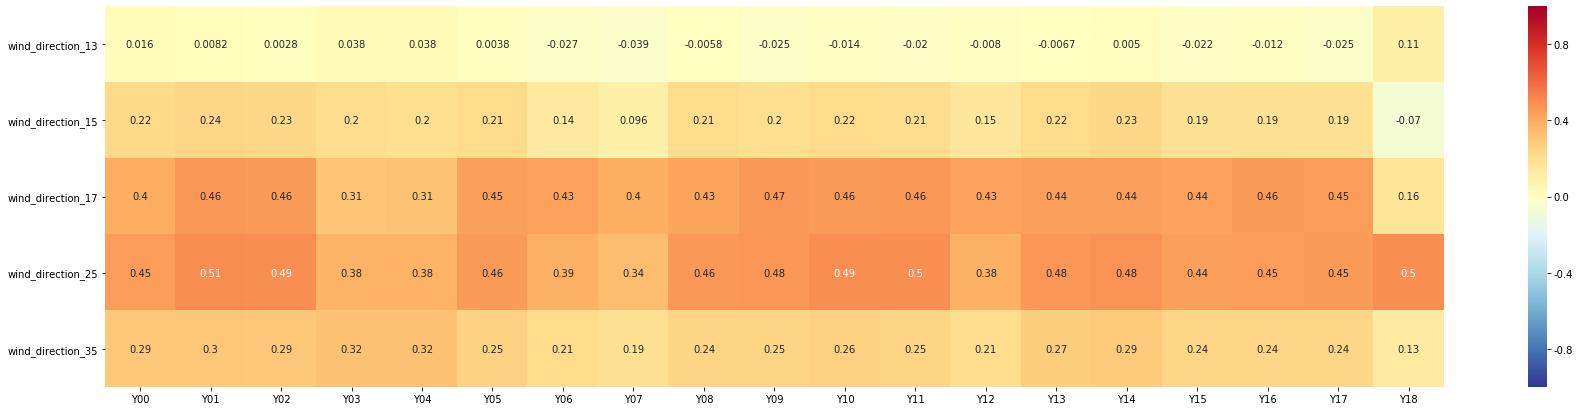

In [95]:
group_8 = ['wind_direction_13', 'wind_direction_15', 'wind_direction_17', 'wind_direction_25', 'wind_direction_35']
show_plot(group_8)

### 모델링 방법

> ### 시계열(RNN / ARIMA)
- 1. X00-39 / Y18 밑에서부터 위의 값 예측
- 2. X00-39 / Y00-17 위에서부터 아래의 값 예측 => X00-39 & Y00-17 / Y18 밑에서부터 위의 값 예측 
- 3. X00-39 / Y00-17 위에서부터 아래의 값 예측 => Y18과 상관도가 높은 데이터로만 학습
    - 이전 데이터 사용 유 / 무 ex) 10분 전 데이터를 사용할 지
    - 입력 데이터가 작다고 생각 => 각 구간별을 더 세분화 ex) 2분 단위

- Y끼리 관계

- 기온 / 풍향 / 습도 / 풍속 시간별?